<a href="https://colab.research.google.com/github/BoredlyGit/FutureMakers2022/blob/main/Day%209/Day_9_Introduction_to_Loss_Functions_NK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

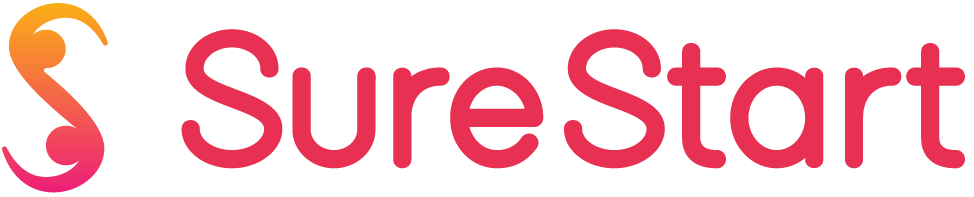

#Day 9 Objectives: 
* To introduce you to loss functions. 


# Loss Functions

Loss functions define what a good prediction is and isn’t. Choosing the right loss function dictates how well your estimator (machine learning model) will be. The criteria by which an estimator is scrutinized is its performance - how accurate the model's decisions are. This calls for a way to measure how far a particular iteration of the model is from the actual values. This is where loss functions come into play.

Loss functions measure how far an estimated value is from its true value. A loss function maps decisions to their associated costs. Loss functions are not fixed, they change depending on the task in hand and the goal to be met.

Worth to note we can speak of different kind of loss functions: **regression loss** functions and **classification loss** functions.

Regression loss function describes the difference between the values that a model is predicting and the actual values of the labels. So the loss function has a meaning on a labeled data when we compare the prediction to the label at a single point of time. This loss function is often called the error function or the error formula. Typical error functions we use for regression models are L1 and L2, Huber loss, Quantile loss, log cosh loss.

**Note**: L1 loss is also know as Mean Absolute Error. L2 Loss is also know as Mean Square Error or Quadratic loss.

Loss functions for classification represent the price paid for inaccuracy of predictions in classification problems (problems of identifying which category a particular observation belongs to). To name a few: log loss, focal loss, exponential loss, hinge loss, relative entropy loss and other.

*Note*: While more commonly used in regression, the square loss function can be re-written and utilized for classification.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Regression Losses

Remember, in regression, the output would be a real value. We need some loss functions which compares two real values.

In [ ]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# get per-feature statistics (mean, standard deviation) from the training set to normalize by
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std

65536/57026 [==================================] - 0s 0us/step


## Mean Squared Error [MSE]

As the name suggests, Mean square error is measured as the average of squared difference between predictions and actual observations. It’s only concerned with the average magnitude of error irrespective of their direction. 

However, <mark>due to squaring, predictions which are far away from actual values are penalized heavily</mark> in comparison to less deviated predictions. Plus MSE has nice mathematical properties which makes it easier to calculate gradients.

Let's assume there are $n$ data samples, for $i^{th}$ sample; the actual output is $y_i$ and $\hat{y}_i$ is the estimated output from the regression model. 

We first square the difference between the original and estimated output with $(y_i - \hat{y}_i)^2$. Then we take sum of the squared difference for all the samples. And finally divide it by the total count of samples, which is $n$. 

$$MSE = \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n}$$

In [ ]:
model = keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam', 
              loss='mse',
              metrics=['mse'])

model.fit(train_features, train_labels, epochs=250, validation_split = 0.1)

Epoch 1/250
12/12 [==============================] - 5s 59ms/step - loss: 588.9922 - mse: 588.9922 - val_loss: 488.0999 - val_mse: 488.0999
Epoch 2/250
12/12 [==============================] - 0s 7ms/step - loss: 568.8149 - mse: 568.8149 - val_loss: 470.1017 - val_mse: 470.1017
Epoch 3/250
12/12 [==============================] - 0s 8ms/step - loss: 546.7189 - mse: 546.7189 - val_loss: 448.4522 - val_mse: 448.4522
Epoch 4/250
12/12 [==============================] - 0s 8ms/step - loss: 518.4816 - mse: 518.4816 - val_loss: 417.8938 - val_mse: 417.8938
Epoch 5/250
12/12 [==============================] - 0s 12ms/step - loss: 478.8366 - mse: 478.8366 - val_loss: 376.5844 - val_mse: 376.5844
Epoch 6/250
12/12 [==============================] - 0s 10ms/step - loss: 426.7117 - mse: 426.7117 - val_loss: 321.6896 - val_mse: 321.6896
Epoch 7/250
12/12 [==============================] - 0s 6ms/step - loss: 358.9562 - mse: 358.9562 - val_loss: 257.5228 - val_mse: 257.5228
Epoch 8/250
12/12 [=====

## Question 1

Now that you know how MSE works, you need to plot the behavior of MSE for the synthetic errors given.  

In [ ]:
np.zeros((11,))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Answer 1

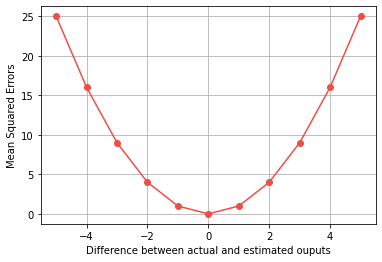

In [ ]:
errors = np.arange(-5, 6)


def mse(pred_arr, truth_arr):
  diff = truth_arr - pred_arr
  mse = np.mean(diff**2)
  return mse

plt.plot(errors, [mse(errors[i], np.array([0])) for i in range(len(errors))], c='#ED4F46', marker='o')
plt.grid()
plt.xlabel('Difference between actual and estimated ouputs')
plt.ylabel('Mean Squared Errors')
plt.show()

## Mean Absolute Error [MAE]

Mean absolute error, on the other hand, is measured as the average of sum of absolute differences between predictions and actual observations. 

Like MSE, this as well measures the magnitude of error without considering their direction. 

Unlike MSE, MAE needs more complicated tools such as linear programming to compute the gradients. Plus MAE is more robust to outliers since it does not make use of square.

Let's assume there are $n$ data samples, for $i^{th}$ sample; the actual output is $y_i$ and $\hat{y}_i$ is the estimated output from the regression model. 

We first take the absolute difference between the original and estimated output with $|y_i - \hat{y}_i|2$. Then we take sum of the absolute differences for all the samples. And finally divide it by the total count of samples, which is $n$. 

$$MSE = \frac{\sum_{i=1}^{n}|y_i - \hat{y}_i|}{n}$$

In [ ]:
model = keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam', 
              loss='mae',
              metrics=['mae'])

model.fit(train_features, train_labels, epochs=250, validation_split = 0.1)

Epoch 1/250
12/12 [==============================] - 1s 14ms/step - loss: 21.9838 - mae: 21.9838 - val_loss: 20.4622 - val_mae: 20.4622
Epoch 2/250
12/12 [==============================] - 0s 5ms/step - loss: 20.7980 - mae: 20.7980 - val_loss: 18.9892 - val_mae: 18.9892
Epoch 3/250
12/12 [==============================] - 0s 5ms/step - loss: 18.8711 - mae: 18.8711 - val_loss: 16.3716 - val_mae: 16.3716
Epoch 4/250
12/12 [==============================] - 0s 5ms/step - loss: 15.4391 - mae: 15.4391 - val_loss: 12.2145 - val_mae: 12.2145
Epoch 5/250
12/12 [==============================] - 0s 5ms/step - loss: 10.6905 - mae: 10.6905 - val_loss: 7.4729 - val_mae: 7.4729
Epoch 6/250
12/12 [==============================] - 0s 5ms/step - loss: 7.3565 - mae: 7.3565 - val_loss: 6.0080 - val_mae: 6.0080
Epoch 7/250
12/12 [==============================] - 0s 4ms/step - loss: 6.2675 - mae: 6.2675 - val_loss: 4.5128 - val_mae: 4.5128
Epoch 8/250
12/12 [==============================] - 0s 5ms/step

## Question 2

Now that you know how MAE works, you need to plot the behavior of MAE for the synthetic errors given.  

### Answer 2

In [ ]:
abs(np.array([-1, -5]))

array([1, 5])

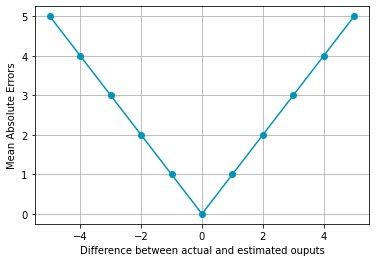

In [ ]:
errors = np.arange(-5, 6)


def mae(pred_array, truth_array):
  return(abs(truth_array - pred_array))


plt.plot(errors, [mae(errors[i], np.array([0])) for i in range(len(errors))], c='#0095B6', marker='o')
plt.grid()
plt.xlabel('Difference between actual and estimated ouputs')
plt.ylabel('Mean Absolute Errors')
plt.show()

## Mean Squared Logarithmic Error [MSLE]

MSLE is just like MSE, but we have to take $log$ of the actual and estimated outputs because squaring and averaging. 

The introduction of the logarithm makes MSLE only care about the relative difference between the true and the predicted value, or in other words, it only cares about the percentual difference between them.

This means that MSLE will treat small differences between small true and predicted values approximately the same as big differences between large true and predicted values.

We can use MSLE when we don't want large errors to be significantly more penalized than small ones, in those cases where the range of the target value is large.

*Example*: You want to predict future house prices, and your dataset includes homes that are orders of magnitude different in price. The price is a continuous value, and therefore, we want to do regression. MSLE can here be used as the loss function.

$$MSLE = \frac{\sum_{i=1}^{n}(\log(y_i+1) - \log(\hat{y}_i+1))^2}{n}$$

In [ ]:
model = keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam', 
              loss=tf.keras.losses.MeanSquaredLogarithmicError(),
              metrics=['mean_squared_logarithmic_error'])

model.fit(train_features, train_labels, epochs=150, validation_split = 0.1)

Epoch 1/150
12/12 [==============================] - 1s 15ms/step - loss: 9.6486 - mean_squared_logarithmic_error: 9.6486 - val_loss: 9.5117 - val_mean_squared_logarithmic_error: 9.5117
Epoch 2/150
12/12 [==============================] - 0s 5ms/step - loss: 9.6486 - mean_squared_logarithmic_error: 9.6486 - val_loss: 9.5117 - val_mean_squared_logarithmic_error: 9.5117
Epoch 3/150
12/12 [==============================] - 0s 5ms/step - loss: 9.6486 - mean_squared_logarithmic_error: 9.6486 - val_loss: 9.5117 - val_mean_squared_logarithmic_error: 9.5117
Epoch 4/150
12/12 [==============================] - 0s 5ms/step - loss: 9.6486 - mean_squared_logarithmic_error: 9.6486 - val_loss: 9.5117 - val_mean_squared_logarithmic_error: 9.5117
Epoch 5/150
12/12 [==============================] - 0s 5ms/step - loss: 9.6486 - mean_squared_logarithmic_error: 9.6486 - val_loss: 9.5117 - val_mean_squared_logarithmic_error: 9.5117
Epoch 6/150
12/12 [==============================] - 0s 5ms/step - loss: 9

## Question 3

Now that you know how MSLE works, you need to plot the behavior of MSLE for the synthetic errors given.  

### Answer 3

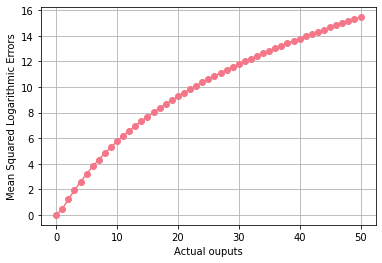

In [ ]:
actual_outputs = np.arange(0, 51)
n = len(actual_outputs)
estimated_outputs = np.zeros(n)


def msle(pred_arr, truth_arr):
  return np.mean((np.log(truth_arr + 1) - np.log(pred_arr + 1))**2)


plt.plot(actual_outputs, [msle(actual_outputs[i], estimated_outputs[i]) for i in range(len(actual_outputs))], c='#F47789', marker='o')
plt.grid()
plt.xlabel('Actual ouputs')
plt.ylabel('Mean Squared Logarithmic Errors')
plt.show()

## Question 4

Why do we add $1$ to the outputs before passing it through $\log()$? 

---

1 is added to the outputs before they are passed through $\log()$ to ensure that all of the output values are above zero (as $\log(0)$ is undefined and $\log(n)$ where n < 0 contains $i$, the imaginary unit ($\sqrt{-1}$))

## Question 5

Write your observations about MSE, MAE, and MSLE; and compare the results achieved with all 3 loss functions. 

---

- MSE forms a parabolic curve, and thus, punishes larger errors/deviations significantly more harshly, at an increasing rate. (This can be good or bad)
- MAE forms 2 straight lines, so deviations are punished on a linear scale. As a result, outliers are still punished more than closer values, but much less harshly.
- MSLE forms a logarithmic curve, and as a result, larger deviations do result in a larger loss value, but less so than in MSE or MAE. Furthermore, the larger the deviation, the less the increase in loss. AS a result, larger loss values tend to have a similar penalty to smaller ones

## Question 6

Plug-in any of the loss functions from [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/losses) docs to the `model.compile` method and see if the difference in model performance as compared to MSE, MAE, and MSLE.

---

- MSE - Drops quickly to around 20 (from initial 543 in 11 epochs), and then descends to 1.8 slowly for the rest of the epochs
- MAE - Drops from 21 to 3 in 11 epochs and the slowly descends to 1.5 by 90 epochs, and remains at about that level (reaches 1 at 250 epochs) 
- MSLE - Drops from 9 to 0.1 in 15 epochs. Reaches 0.03 at 43 epochs, and spends the rest dropping to 0.01. Performed the best.

In [ ]:
model = keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam', 
              loss= "msle",
              metrics=["mse", "mae", "msle"])

model.fit(train_features, train_labels, epochs=250, validation_split = 0.1)

Epoch 1/250
12/12 [==============================] - 1s 47ms/step - loss: 7.7006 - mse: 575.0555 - mae: 22.0237 - msle: 7.7006 - val_loss: 5.9607 - val_mse: 466.0803 - val_mae: 20.5047 - val_msle: 5.9607
Epoch 2/250
12/12 [==============================] - 0s 15ms/step - loss: 5.0368 - mse: 529.1911 - mae: 20.9400 - msle: 5.0368 - val_loss: 3.9186 - val_mse: 418.7056 - val_mae: 19.2327 - val_msle: 3.9186
Epoch 3/250
12/12 [==============================] - 0s 16ms/step - loss: 3.2533 - mse: 470.1754 - mae: 19.4402 - msle: 3.2533 - val_loss: 2.4439 - val_mse: 356.6957 - val_mae: 17.5212 - val_msle: 2.4439
Epoch 4/250
12/12 [==============================] - 0s 11ms/step - loss: 1.9767 - mse: 393.4931 - mae: 17.4312 - msle: 1.9767 - val_loss: 1.4155 - val_mse: 281.7875 - val_mae: 15.3098 - val_msle: 1.4155
Epoch 5/250
12/12 [==============================] - 0s 14ms/step - loss: 1.1384 - mse: 307.7656 - mae: 15.0150 - msle: 1.1384 - val_loss: 0.7717 - val_mse: 203.9848 - val_mae: 12.9019

#Fun Fact

Google Translate is getting better all the time, but it's still not perfect. Translate a sentence into another language and back into English, and you might get a hilarious surprise. That's what Malinda Kathleen Reese got when she reverse Google Translated the lyrics to "Let It Go" from Disney's Frozen into Chinese, Macedonian, French, Polish, Creole, Tamil and others. It doesn't come out as utter gibberish, but as a slightly off version with a slightly different message from the original. Which makes it even funnier. Plus, Malinda can really sing.

Link to video: https://www.youtube.com/watch?v=2bVAoVlFYf0

# Classification Losses

In classification, the outputs are in form of a class or a category. The label or number assigned to the classes do not have a numerical meaning. 

For example, an input with class label 0 cannot be numerically compared with an input with class label 1. 

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode="coarse")

training_images=training_images.reshape(50000, 32, 32, 3)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 32, 32, 3)
test_images=test_images/255.0

169017344/169001437 [==============================] - 3s 0us/step


## Kullback-Leibler Divergence [KDL]

Kullback Leibler Divergence Loss is a measure of how a distribution varies from a reference distribution (or a baseline distribution). A Kullback Leibler Divergence Loss of zero means that both the probability distributions are identical.

The number of information lost in the predicted distribution is used as a measure.

$$KDL(p||q) = \int_x p(x) \log \frac{p(x)}{q(x)} dx$$

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  # tf.keras.layers.Dense(100, activation='softmax')
  tf.keras.layers.Dense(20, activation='softmax')
])


model.compile(optimizer='adam', loss='kl_divergence', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 56.9190 - accuracy: 0.0502 - val_loss: 56.9189 - val_accuracy: 0.0474
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 56.9189 - accuracy: 0.0487 - val_loss: 56.9189 - val_accuracy: 0.0500
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 56.9189 - accuracy: 0.0495 - val_loss: 56.9189 - val_accuracy: 0.0500
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 56.9189 - accuracy: 0.0504 - val_loss: 56.9189 - val_accuracy: 0.0500
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 56.9188 - accuracy: 0.0521 - val_loss: 56.9189 - val_accuracy: 0.0498
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 56.9188 - accuracy: 0.0488 - val_loss: 56.9189 - val_accuracy: 0.0499
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 56.9189 - accuracy: 0.0483 - val_loss: 56.9189

##Binary Cross Entropy
Cross-entropy is a measure from the field of information theory, building upon entropy and generally calculating the difference between two probability distributions. It is closely related to but is different from KL divergence that calculates the relative entropy between two probability distributions, whereas cross-entropy can be thought to calculate the total entropy between the distributions.

Cross-entropy is also related to and often confused with logistic loss, called log loss. Although the two measures are derived from a different source, when used as loss functions for classification models, both measures calculate the same quantity and can be used interchangeably.

Binary crossentropy is a loss function that is used in binary classification tasks. These are tasks that answer a question with only two choices (yes or no, A or B, 0 or 1, left or right). Several independent such questions can be answered at the same time, as in multi-label classification or in binary image segmentation. Formally, this loss is equal to the average of the categorical crossentropy loss on many two-category tasks.

$$BCE = -\frac{1}{N} \sum_{i=1}^N y_i \cdot \log(p(y_i)) + (1-y_i) \cdot \log(1- p(y_i))$$

In [4]:
# Note: changed one-hot vector size from 100 to 20 (no idea why it was 100, theres only 20 classes)

training_labels = tf.reshape(tf.one_hot(training_labels, 20), [training_labels.shape[0], 20])
print(training_labels.shape)

test_labels = tf.reshape(tf.one_hot(test_labels, 20), [test_labels.shape[0], 20])
print(test_labels.shape)

(50000, 20)
(10000, 20)


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(100, activation='softmax')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50


ValueError: ignored

## Question 7

Do you see any problems/errors with the above code? Please describe.

---

The above code attempts to use the binary_crossentropy loss function, which only works with 2 classes and 1 output node (the output node outputs 0 for 1 class and 1 for the other) - this problem has 20 classes, and thus multiple output nodes. Furthermore, it has 100 output nodes - far more than necessary for the 20-class problem here.

## Categorical Cross Entropy

This is the most common setting for classification problems. Cross-entropy loss increases as the **predicted probability** strays away from the **actual label**.

Note that we have to compare the probabilities (e.g. [0.20, 0.75, 0.05]) of all the classes with the actual labels (e.g., [0, 1, 0]). The actual labels would be one-hot encoding.

An important aspect of this is that cross entropy loss penalizes heavily the predictions that are confident but wrong.

We are multiplying the log of the actual predicted probability for the ground truth class.

$$CCE = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i)$$ 

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(20, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=25, validation_data=(test_images, test_labels))

Epoch 1/25
1563/1563 [==============================] - 9s 5ms/step - loss: 2.4630 - accuracy: 0.2356 - val_loss: 2.2518 - val_accuracy: 0.3002
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1380 - accuracy: 0.3324 - val_loss: 2.1045 - val_accuracy: 0.3407
Epoch 3/25
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0079 - accuracy: 0.3719 - val_loss: 1.9668 - val_accuracy: 0.3824
Epoch 4/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9134 - accuracy: 0.4000 - val_loss: 1.9331 - val_accuracy: 0.3953
Epoch 5/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8361 - accuracy: 0.4231 - val_loss: 1.9188 - val_accuracy: 0.3959
Epoch 6/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7797 - accuracy: 0.4418 - val_loss: 1.8752 - val_accuracy: 0.4143
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7289 - accuracy: 0.4561 - val_loss: 1.8183 - val_accuracy

## Question 8

Now that you know how CCE works, you need to code it. It should give the same answer as `tf.keras.metrics.categorical_crossentropy` would.

### Answer 8

In [5]:
def categorical_crossentropy(true, pred):
    
    loss = np.sum((true*np.log(pred)))*(-1/len(pred))

    return loss

true = tf.constant([[0.0, 1.0, 0.0],
                    [1.0, 0.0, 0.0],
                    [1.0, 0.0, 0.0],
                    [0.0, 0.0, 1.0]])
pred = tf.constant([[0.20, 0.70, 0.10],
                    [0.80, 0.05, 0.15],
                    [0.75, 0.10, 0.15],
                    [0.25, 0.15, 0.60]])

loss = categorical_crossentropy(true, pred)
print(loss)

loss = tf.keras.metrics.categorical_crossentropy(true, pred)
loss = tf.reduce_mean(loss)
print(loss)

0.3445815443992615
tf.Tensor(0.34458154, shape=(), dtype=float32)


## Sparse Categorical Cross Entropy

Both, Categorical Cross Entropy [CCE] and Sparse Categorical Cross Entropy [SCCE] have the same loss function. The only difference is the format of $y_i$ (i.e., true labels).

If $y_i$'s are one-hot encoded, we should use CCE. Examples (for a 3-class classification): [1,0,0], [0,1,0], [0,0,1]

But if $y_i$'s are integers, use SCCE. Examples for above 3-class classification problem: [1], [2], [3]

The usage entirely depends on how we load our dataset. One advantage of using sparse categorical cross entropy is it saves time in memory as well as computation because it simply uses a single integer for a class, rather than a whole vector.

$$SCCE = -\log(\hat{y}_i)$$ for $i$ where $one\text{-}hot\text{-}encoding[i] = 1$ 

In [6]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode="coarse")

training_images=training_images.reshape(50000, 32, 32, 3)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 32, 32, 3)
test_images=test_images/255.0

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(20, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=25, validation_data=(test_images, test_labels))

Epoch 1/25
1563/1563 [==============================] - 61s 39ms/step - loss: 2.4590 - accuracy: 0.2350 - val_loss: 2.2852 - val_accuracy: 0.2859
Epoch 2/25
1563/1563 [==============================] - 63s 40ms/step - loss: 2.1183 - accuracy: 0.3443 - val_loss: 2.0464 - val_accuracy: 0.3636
Epoch 3/25
1563/1563 [==============================] - 60s 39ms/step - loss: 1.9833 - accuracy: 0.3853 - val_loss: 1.9930 - val_accuracy: 0.3846
Epoch 4/25
1563/1563 [==============================] - 61s 39ms/step - loss: 1.8923 - accuracy: 0.4107 - val_loss: 1.9062 - val_accuracy: 0.4062
Epoch 5/25
1563/1563 [==============================] - 61s 39ms/step - loss: 1.8158 - accuracy: 0.4342 - val_loss: 1.8630 - val_accuracy: 0.4226
Epoch 6/25
1563/1563 [==============================] - 61s 39ms/step - loss: 1.7532 - accuracy: 0.4533 - val_loss: 1.8205 - val_accuracy: 0.4290
Epoch 7/25
1563/1563 [==============================] - 59s 38ms/step - loss: 1.7004 - accuracy: 0.4678 - val_loss: 1.7988 -

## Question 9

What is the difference between a Multi-class and Multi-label Classification problem, and what sort of loss function would we need to learn them?

---

A Multi-class classification problem involves classes which are mutually exclusive - one input can correspond to only 1 output. As a result, sparce categorical cross entropy is best suited for this type of problem, but it can also be done using categorical cross entropy with one-hot vectors. In contrast, Multi-label classification problems can contain more than 1 class per input tensor (classes are not mutually exclusive) - thus, categorical cross entropy must be used for this type of problem (with multi-hot arrays).

## Question 10
What is the relationship between Binary Cross entropy and Categorical Cross entropy?

---

Binary cross entropy and categorical cross entropy both use the corss entropy function, but binary cross entropy is specialized for binary classification (2 mutualy exclusive classes, with output determined by a single node), while categorical cross entropy is used for muli-class classification (2+ classes, multiple output nodes, may or may not be mutually exclusive).

## Question 11

What is the relationship between Sparse Cross entropy and Categorical Cross entropy?

---

Both Sparse Cross entropy and Categorical Cross entropy use the same loss function behind the scenes (categorical loss), and differ only in the way they take inputs (sparse takes integer values, categrorical takes arrays).

# **Upload this Day 9 Colab Notebook to your Github repository under "Day 9" folder. Also add your *Reflection* on today's learning in README.md**

Sources:

https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23

https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/mean-squared-logarithmic-error-(msle)